In [ ]:
import pandas as pd
import numpy as np #one of the accepted data types in tensorflow's .fit() function
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Loan Default Data 2023/train 3.csv')

df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


##General Data Observations

In [ ]:
# No missing values

df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

The target variable is Loan Status

In [ ]:
df['Loan Status'].value_counts(normalize=True)

0    0.90749
1    0.09251
Name: Loan Status, dtype: float64

The target class is highly imbalanced. SMOTE may help after data is split

In [ ]:
df = df._get_numeric_data()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Home Ownership                67463 non-null  float64
 7   Debit to Income               67463 non-null  float64
 8   Delinquency - two years       67463 non-null  int64  
 9   Inquires - six months         67463 non-null  int64  
 10  Open Account                  67463 non-null  int64  
 11  Public Record                 67463 non-null  int64  
 12  Revolving Balance             67463 non-null  int64  
 13  R

##Splitting Training and Test Data

In [ ]:
X = df.iloc[:,:-1]
y = df['Loan Status']


In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42 )

In [ ]:
train_labels= []
train_samples = []

In [ ]:
y_train.shape

(45200,)

In [ ]:
X_train.shape

(45200, 25)

###Shuffling Data Order

In [ ]:
from pandas.core.internals.base import np_can_hold_element
train_labels= np.array(y_train)
train_samples = np.array(X_train)

# train_labels = np.stack(y_train, axis=0)
# train_samples = np.stack(X_train, axis=0)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
# I have to make sure the data is all on the same scale for efficiency and better results

scaler = MinMaxScaler(feature_range=(0,1))

scaled_train_samples = scaler.fit_transform(train_samples) #reshape is a formality. The fit_transform function does not accept 1D arrays

##Balancing Data

In [ ]:
# balance the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2023) 
scaled_train_samples, train_labels = sm.fit_resample(scaled_train_samples, train_labels) 

In [ ]:
scaled_train_samples.shape

(82038, 25)

In [ ]:
# for i in scaled_train_samples:
#   print(i)

##Simple tf.keras Sequential Model

A Sequential Model is a linear stack of Layers

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy



In [ ]:
# a sequential model with 2 hidden layers and the output layer (last dense layer)

model = Sequential([
    Dense(units=16, input_dim =25, activation='relu'), #the first two dense layers are hidden layers. The input layer is created with input data
    Dense(units=32, activation='relu'),
    Dense(units=2, activation = 'softmax') #this last dense layer is the output layer | softmax will provide probabilities of an instance being of each class

])

In [ ]:
#Sumary of my sequential model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


##Model Optimizer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse',
              metrics=['accuracy'])

##Model Fitting

In [ ]:
model.fit(x=scaled_train_samples,
          y=train_labels,
          validation_split=0.2,
          batch_size=10,
          epochs=30,
          shuffle=True,
          verbose=2)

Epoch 1/30
6563/6563 - 31s - loss: 0.2501 - accuracy: 0.4908 - val_loss: 0.2500 - val_accuracy: 0.3437 - 31s/epoch - 5ms/step
Epoch 2/30
6563/6563 - 14s - loss: 0.2500 - accuracy: 0.5011 - val_loss: 0.2500 - val_accuracy: 0.5756 - 14s/epoch - 2ms/step
Epoch 3/30
6563/6563 - 21s - loss: 0.2500 - accuracy: 0.5008 - val_loss: 0.2500 - val_accuracy: 0.0094 - 21s/epoch - 3ms/step
Epoch 4/30
6563/6563 - 21s - loss: 0.2500 - accuracy: 0.4986 - val_loss: 0.2500 - val_accuracy: 0.1993 - 21s/epoch - 3ms/step
Epoch 5/30
6563/6563 - 11s - loss: 0.2500 - accuracy: 0.4978 - val_loss: 0.2500 - val_accuracy: 0.9501 - 11s/epoch - 2ms/step
Epoch 6/30
6563/6563 - 12s - loss: 0.2500 - accuracy: 0.4978 - val_loss: 0.2500 - val_accuracy: 0.2308 - 12s/epoch - 2ms/step
Epoch 7/30
6563/6563 - 12s - loss: 0.2500 - accuracy: 0.4993 - val_loss: 0.2500 - val_accuracy: 0.9197 - 12s/epoch - 2ms/step
Epoch 8/30
6563/6563 - 14s - loss: 0.2500 - accuracy: 0.4993 - val_loss: 0.2500 - val_accuracy: 0.0862 - 14s/epoch - 2

##Predictions


In [ ]:
test_samples = np.array(X_test)

scaled_test_samples = scaler.fit_transform(test_samples)

In [ ]:
predictions = model.predict(x=scaled_test_samples , batch_size=10, verbose=0)

In [ ]:
for i in predictions:
  print(i)

Streaming output truncated to the last 5000 lines.
[0.49999112 0.5000089 ]
[0.49999556 0.5000044 ]
[0.49998853 0.50001144]
[0.49999255 0.50000745]
[0.49999636 0.5000037 ]
[0.49999434 0.5000057 ]
[0.4999908 0.5000092]
[0.49999425 0.5000057 ]
[0.49999025 0.5000097 ]
[0.49999735 0.5000026 ]
[0.4999928 0.5000072]
[0.499996   0.50000405]
[0.49999213 0.5000079 ]
[0.49999267 0.50000733]
[0.4999928 0.5000073]
[0.49999365 0.5000063 ]
[0.49999586 0.5000042 ]
[0.4999967 0.5000033]
[0.49998775 0.5000123 ]
[0.49999514 0.5000048 ]
[0.49999535 0.5000047 ]
[0.4999944 0.5000056]
[0.49998719 0.5000129 ]
[0.49999085 0.5000091 ]
[0.4999925  0.50000757]
[0.49999437 0.50000566]
[0.49999508 0.5000049 ]
[0.49998695 0.50001305]
[0.49999717 0.5000028 ]
[0.49999392 0.50000614]
[0.4999951  0.50000495]
[0.49999774 0.5000023 ]
[0.49999064 0.50000936]
[0.49999297 0.5000071 ]
[0.4999923  0.50000775]
[0.50000006 0.4999999 ]
[0.49999222 0.50000775]
[0.49999005 0.50001   ]
[0.49999577 0.5000043 ]
[0.49999842 0.50000155]

In [ ]:
rounded_predictions = np.argmax(predictions, axis =-1)

In [ ]:
for i in rounded_predictions:
  print(i)

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1

##Evaluating Performance on Test Data | Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(
    cm, classes,
    normalize=False,
    title='Confusiion Matrix',
    cmap=plt.cm.Blues):
  
  
  """
  This function plits the confusion matrix.
  Normalization can be applied when set to True
  """

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusiion Matrix')
  else:
    print('Confusion Matrix Without Normalization')
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

Confusion Matrix Without Normalization
[[  933 19270]
 [  112  1948]]


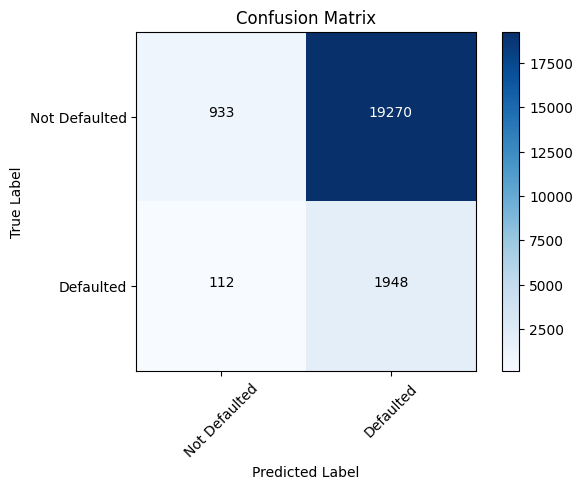

In [ ]:
cm_plot_labels = ['Not Defaulted', 'Defaulted']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# My model is not great at predicting whether clients will default on a loan or not. The split is about 50/50

##Save/Load Model Option 1

This save fucntion saves:

- Model Architecture
- Model weights
- Training Configuration
- Most recent state of the optimizer

In [ ]:
import os.path

if os.path.isfile('/content/drive/MyDrive/Loan Default Data 2023/loan_def_deep_model.h5') is False:
  model.save('/content/drive/MyDrive/Loan Default Data 2023/loan_def_deep_model.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('/content/drive/MyDrive/Loan Default Data 2023/loan_def_deep_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[ 0.01565318,  0.09274442, -0.071853  , -0.1353688 ,  0.13626237,
         -0.39168826, -0.01479219, -0.32369578,  0.27128574,  0.29579335,
         -0.02637297, -0.03583712,  0.14155415,  0.14524905, -0.21038175,
          0.02287837],
        [ 0.02879482,  0.29011142, -0.38369802, -0.24303481,  0.30971912,
         -0.02648581,  0.2176512 , -0.24881786,  0.1198931 ,  0.34867355,
          0.24625474,  0.05834159, -0.29244363,  0.2755477 , -0.03423285,
         -0.08965427],
        [ 0.10885922, -0.26207247,  0.3354882 , -0.15237248,  0.34356222,
         -0.39802182,  0.30452365, -0.05122309, -0.25038117,  0.03990705,
          0.36215094,  0.22379531, -0.02674129,  0.25507486, -0.01765553,
         -0.4133684 ],
        [ 0.24841864, -0.17202157, -0.16998143,  0.04780807,  0.03625871,
          0.13207388,  0.31227612, -0.27662548, -0.27477327,  0.15014103,
         -0.18716353,  0.19300057, -0.06130961,  0.19562043, -0.15448608,
         -0.27661616],
        [-0.3734459 

In [ ]:
new_model.optimizer

##Save/Load Model Option 2 | JSON file

This option will only save the model architecture

In [ ]:
json_string = model.to_json()



In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 25], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 25], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias

In [ ]:
from keras.models import model_from_json

model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


##Saving option 3 is to save only the weights using model.save_weights()